# Programming for Data Science and Artificial Intelligence

## Sklearn

so fat
- bootcamp - Python
- Numpy 
- Pandas

Today
- Sklearn - machine learning

- Matplotlib
- Deploying models to the internet - 6 hours

At this point, you can already work in many entry-level DS jobs.

- Regression from scratch 
- Classification from scratch
- Clustering from scratch + sklearn
- Dimensionality reduction + sklearn

Midterm
Deep Learning
- PyTorch (Numpy equivalent called torch tensors)
- Fully-Connected Neuraul Network
- Convolutional Neural Network

Signal Processing - useful for EEG, Wifi, stock, time series

Optional: AWS, GAN, Autoencoders, etc.

Chaky - why do I need to code ?
--> some company just use software- Rapidminer. Weka, Auzer ML, etc.
--> these software are very powerful. and can do many **typical ML** stuffs
--> but the hihglight ofcdoing, is that youcan custormize as mich as you want, you 
can always use the lasted algorithm, you don't have stick with the preprocessing 
techniqtue these software gave you ... etc... basically, coding is the MOST powetful.

Four jobs in the market:

Thailand : 35K - 200K

- Data Anaylsts : Tools : PowerBI, Excel, SQL
- Data Scientits : mathamtics oriented; mostly Python
- Data Engineers : Database, cloud computing -AWS, Microsoft thingy
- ML oops : software engineers in ML domain (very very efficient, and optimized - 
true computer science program)

In [2]:
# Pandas is built on top of NumPy
#   it means that Pandas, in a very raw level, is actually nothing but NumPy array
#   pandas has added functionality, like dealing with missing values, for example

# so why NumPy?  Why not use Pandas always?
# Pandas is MUCH slower than NumPy

### Import Pandas

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.1'

# 1. Extract-Transform-Load (ETL) 

- Challenge: many data sources; maintain a lot of connectors; transform them to one single format

### Load csv file

In [5]:
#the name of data that pandas called, is "Dataframe"
df = pd.read_csv("howlongwelive.csv")

### Preview the dataframe

In [6]:
#you use df.head()
#format: df.head(number of rows; default is 5; you can also put negative numbers)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
#as I say, Pandas IS NumPy
df.shape

#means that there are 2938 rows, and 22 columns

(2938, 22)

In [8]:
#maybe you want a list of columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)
- looking at the distribution of data
- plot something useful
- understand the data
- know which features to use
  
Note: **this is the MOST important step in all data science**

In [9]:
## related seaborn
#df.info()

#list the datatypes of the dataframe
#key: we DON'T LIKE "object" ==> "string"

#so when you "object", you change it to numbers or drop it

In [10]:
#two ways to access each column
#format1:  df['colname']
#format2:  df.colname
df['Status']  #try df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [11]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [12]:
developing_cond = df['Status'] == 'Developing'
developed_cond  = df['Status'] == 'Developed'

In [13]:
print("Number of developing countries: ", 
      len(df.Status[developing_cond]))

print ("Number of developed countries: ", 
       df.Status[developed_cond].count())

Number of developing countries:  2426
Number of developed countries:  512


In [14]:
df.Status[developed_cond].shape[0]

512

In [15]:
df['Alcohol'].max()  #try min(), mean(), median()

17.87

In [16]:
df.Alcohol.min(), df.Alcohol.mean(), df.Alcohol.median()

(0.01, 4.602860787172012, 3.755)

In [17]:
#exercise: get the rows with alcohol more than the median
#and count
#challenge: list these unique countries

#Answer:
#fancy_indexes = df.Alcohol > df.Alcohol.median()
#df.Country[fancy_indexes].unique()

In [18]:
#exercise2: get the list of country
#with Schooling more than the median
#and GDP more than the median

cond1 = df.Schooling > df.Schooling.median()
cond2 = df.GDP > df.GDP.median()

countries = df.Country[cond1 & cond2].unique()
#use | for or

type(countries)

numpy.ndarray

In [19]:
#for any columns of continuous value, 
# it gives you count, mean, std, min, etc.
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
#use some easy library for visualization
#it accepts input as dataframe
import seaborn as sns
#seaborn: super easy library for visualization
#it's built on top of matplotlib 
#matplotlib is the classic python library for visualization

#if i want to predict egg price, using gold and oil prices
#we called gold and oil prices MANY names
#   features, factors, independent variables, predictors, X
#   here, gold is called x_1, oil is called x_2
#we called egg price MANY names
#   labels, targets, outcomes, dependent variables, y

<AxesSubplot:xlabel='Status', ylabel='count'>

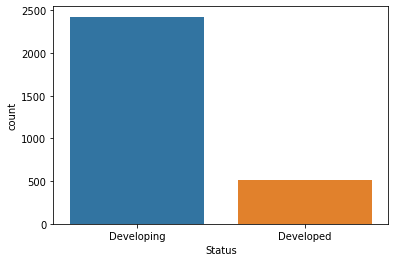

In [21]:
#1. countplot is to plot the discrete x_1 or y
sns.countplot(data = df, x="Status")

In [22]:
sns.__version__

'0.11.2'

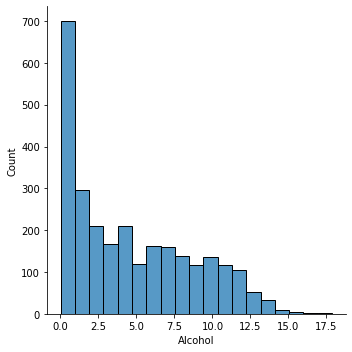

In [23]:
#2. distplot or displt is to plot the continuous x_1 or y
sns.displot(df.Alcohol)  #==> you get error, this is because your version is not >0.10
#displot = distribution plot

#exercise: try displot for another continuous variable

In [24]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
'''
format: .rename(
    columns =
    {oldname: newname,
     oldname2: newname2,
     oldname3: newname3}
)
'''
df = df.rename(
    columns = {'Life expectancy ': 'life-exp',
               'Income composition of resources' : 'income',
               'Schooling' : 'schooling'}
)

# df.head()

#tips:  if you don't want to do df=, just put a argument inplace=True
#exercise: can you change 
#   Income composition of resources to income, 
#   Schooling to schooling and 
#   Status to status

In [26]:
#challenge: help clear all the spaces in the columns
import numpy as np
df.columns = df.columns.str.strip()

df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'],
      dtype='object')

<AxesSubplot:xlabel='Status', ylabel='life-exp'>

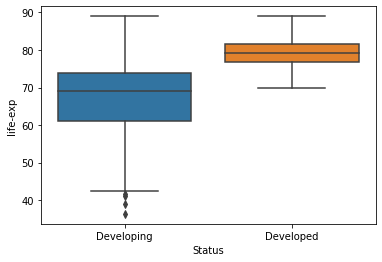

In [27]:
#3. boxplot is to plot discrete x_1 vs. continuous x_2/y
sns.boxplot(x = df['Status'], y = df['life-exp'])

<AxesSubplot:xlabel='Alcohol', ylabel='life-exp'>

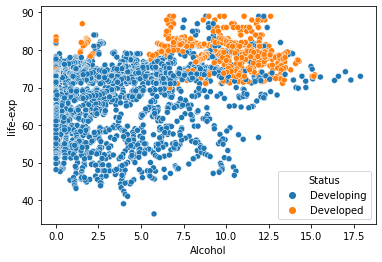

In [28]:
#4. scatterplot is to plot continuous x_1 vs. continuous x_2/y
#hue MUST be a discrete variable
sns.scatterplot(x = df['Alcohol'], y = df['life-exp'], hue = df['Status'])

In [29]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'],
      dtype='object')

In [30]:
cols = df.columns
cols = np.array(cols)

type(cols)

numpy.ndarray

In [31]:
#then i have to check how to remove
cols = np.delete(cols, np.where(cols=='Status'))
cols = np.delete(cols, np.where(cols=='Country'))
cols = np.delete(cols, np.where(cols=='life-exp'))
cols = np.delete(cols, np.where(cols=='Year'))

cols


array(['Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'], dtype=object)

In [32]:
#exercise, find me the features that have very strong correlation with life-exp
#exercise, which features have almost NO relationship with life exp

#get some columns, but I also have to drop some columns - drop Status, drop Country, drop life-exp
# import matplotlib.pyplot as plt
# for each_col in cols: 
#     sns.scatterplot(x = df[each_col], y = df['life-exp'], hue = df['Status'])
#     plt.show()

<AxesSubplot:>

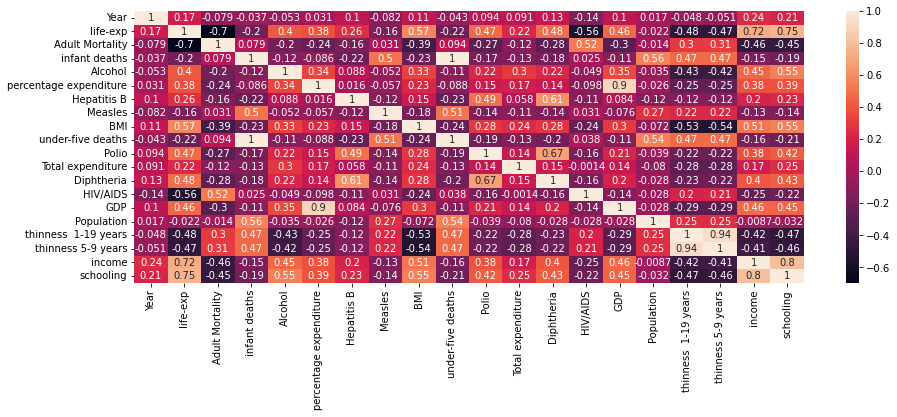

In [33]:
#exercise:  try sns.heatmap(df.corr(), annot=True)
#df.corr() calculates the correlation between continuous features

#exercise:  try to figure out how to increase the size of the figure 
# (hint: you have to change using matplotlib figure size)

#1st way: use sns.set 
#2nd way: set the figure size via the plt variable of matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)

### 3. Preprocessing / Cleaning

#### 3.1 dealing with missing values
  - Case 1: **Continuous values**
    - Replace with:
      - 1. **mean/median** if the distribution is normal
      - 2. **median** if the distribution is NOT normal
      - 3. **0** if 0 is a very common occurrence in the real-world
      - 4. **regression** if your data fits nicely with regression, especially linear regression
    - Do we ever drop?
      - Almost never.  Drop columns lose a lot of values, dropping rows also lost other features....
      - If you are super sure this is human mistake, you can drop
  - Case 2: **Discrete values**
    - Replace with: 
      - 1. **Majority** - when majority is like 90%
      - 2. **No category** - when we are not so sure
      - 3. **Ratio** - preserve the shape of distribution

In [34]:
#function to quickly check missing values
df.isna().sum()

# df['life-exp'].isna().sum()

#this is my plan:

#features: income, schooling, status
#label   : life-exp

Country                     0
Year                        0
Status                      0
life-exp                   10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
thinness  1-19 years       34
thinness 5-9 years         34
income                    167
schooling                 163
dtype: int64

(0.6275510645976182, 0.677)

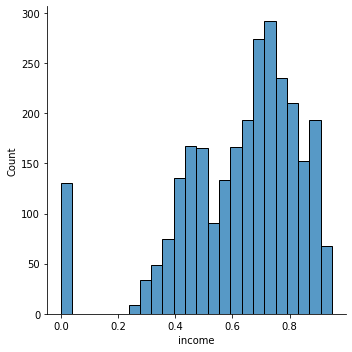

In [35]:
#typical steps to fill in missing value (continuous values)

#1. Ex1: plot the distribution (income, schooling, life-exp)
#if your data is discrete, use countplot
sns.displot(df['income'])

#2. Ex2: print mean and median
df['income'].mean(), df['income'].median()

#3. judge by yourself mean or median better, then fillna
##########I COMMENT DUE TO POSSIBLE DATA LEAKAGE
# df['income'] = df['income'].fillna(df['income'].median())
#df['income'].fillna(df['income'].median(), inplace=True)  ==> you don't have assign a variable to take the value

#exercise: please fillna for schooling and life-exp

#1. plot the distribution
# let's assume i plot already, and i found that median is a good representation
# good representation - high probability
# ##########I COMMENT DUE TO POSSIBLE DATA LEAKAGE
# df['life-exp'] = df['life-exp'].fillna(df['life-exp'].median())
# df['schooling'] = df['schooling'].fillna(df['schooling'].median())

#make sure schooling.isna().sum() and life-exp.isna().sum() is 0

#1, 2, 3, 3, 100

#assert df['schooling'].isna().sum() == 0  #unit test

#mean = 22
#median = 3

In [36]:
#press B to quickly get new cell
#press D D to quickly delete cell
#press M to change to markdown

In [37]:
# df.isna().sum()

In [38]:
# cols = ['life-exp', 'income', 'schooling']

# for col in cols:
#     df[col].fillna(df[col].median(), inplace=True)

# assert df['life-exp'].isna().sum() == 0
# assert df['income'].isna().sum() == 0
# assert df['schooling'].isna().sum() == 0

#one thing very important
#if YOU HAVE MISSING VALUES, when you run ML models
#   you will get error:  Infinity NaN values.....
#if you want to drop the rows, use df[colname].dropna()

#### 3.2 Convert strings to numbers (float/int)

- because ALL ML and DL models don't take strings
  - data type error:  Expected int/float but got strings
- to quickly scan use info(), note the "objects"

In [39]:
#df.info() 
#scan for dtype = objects

In [40]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

#### Theory/principle how to convert string to integer/float

Three ways:

1. **Label encoding**: Just change to number:
   1. Example: change developing to 0, developed to 1
   2. Pros: super simple
   3. Cons: imagine you got encoded 0, 1, 2, 3, 4, 5
      1. You create a unwanted knowledge of order within this, e.g., 5 > 1
      2. NEVER USE label encoding if you have more than two categories
2. **One-hot encoding**: Pivot the values and make it become the columns
   1. Delete the column "Status"
   2. Put Developing as one column; Developed as another column
      1. if Developing is true, put 1, and then Developed will be 0
      2. if Developing is false, put 0, and then in the Developed col, will be 1
3. **Sparse one-hot encoding**: if you have n columns of pivot, you can always delete 1 to save space.

In [41]:
#we want to convert Status to 0 and 1
#easiest way is to use sklearn.preprocessing import LabelEncoder

#1. import the library
from sklearn.preprocessing import LabelEncoder

#2. create the object
le = LabelEncoder()

#3. fit and transform
some_make_up_data = np.array(["Male", "Female", "Female", "Male"]) #===one column of df
result = le.fit_transform(some_make_up_data)

print(result)

#if you want to know which map to which, use le.inverse_transform(np.array([0, 1]))

'''
le.fit_transform(some_make_up_data) 

=== 

le.fit(some_make_up_data)  #learn the mapping
result = le.transform(some_make_up_data)  #transform the data

'''

#i want to tell the difference between fit and transform
#fit means learn the pattern
#transform means transform the data

[1 0 0 1]


'\nle.fit_transform(some_make_up_data) \n\n=== \n\nle.fit(some_make_up_data)  #learn the mapping\nresult = le.transform(some_make_up_data)  #transform the data\n\n'

In [42]:
#Exercise: please tranform Status using LabelEncoder
df['status_en'] = le.fit_transform(df['Status'])
df['status_en'].unique()

array([1, 0])

In [43]:
#to know that what maps to what 
le.inverse_transform(np.array([0, 1]))

array(['Developed', 'Developing'], dtype=object)

In [44]:
#test that my transformation is correct
assert len(df['status_en'].unique()) == 2

Break: 16:50 - 17:00

#### 3.3 Standardization / Normalization

-i.e., we usually do splitting before any preprocessing

- splitting - test train split before any preprocessing
  - if you standardize
  - if you fill missing value with some global statistics, you should split
  - (it's ok to label encode)

- when some knowledge of the testing set flows to the training set, we called "data leakage"  --> this is one of MOST COMMON MISTAKES of all beginners...like 99%


In [45]:
data = np.array([[1, 5], [2, 6], [3, 7], [4, 8]])

In [46]:
np.array([1, 2, 3, 4]).std()

1.118033988749895

In [47]:
(2 - 2.5) / 1.11

-0.4504504504504504

In [48]:
#for each feature, do (x - mean) / std

#for the first feature, mean = (1 + 2 + 3 + 4) / 4 = 2.5
# for the first data, do (1 - 2.5) / 1.11 = -1.35
# for the second data, do (2 - 2.5) / 1.11 = -0.45

#after standardization, all features will have same scale
#all features mean = 0, std = 1

#1. import the library
from sklearn.preprocessing import StandardScaler

#2. create the object
sc = StandardScaler()

#3. fit and transform
standardized_data = sc.fit_transform(data)

print(standardized_data)

#when do you want to standardize your data:
#1. when you use regression, definitely yes - feature importance
#2. in most classification algorithms (not distance-based algorithms), you benefit a bit
#   from standardization
#3. your training will be more stable

#when you should NOT standardize your data:
#1. when the mean does not represent well your data
#   signal
#   we can either do nothing or do min-max normalization
#from sklearn.preprocessing import MinMaxScaler #try this at your home
# (x - xmax) / (xmax - xmin) ==> (0, 1)

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


### 4. Feature Extracton / Selection

- Seriously consider which X and y to use for training

In [49]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling', 'status_en'],
      dtype='object')

#### Define X and y

In [50]:
X = df[['income', 'schooling', 'status_en']]
X.shape

#for X to be used with sklearn, it must be in the shape of (m, n)
#where m is number of samples, and n is number of features
#if you have only one feature, n = 1 (e.g., it cannot be (m, ); MUST be (m, 1))

assert X.shape[0] > 0
assert X.shape[1] > 0

In [1]:
y = df['life-exp']
#for y to be used with sklearn, if you only have one label,
#the shape is (m, ), where m is number of samples
#another possible is (m,k) ,  k is the number of classes
#for sample 1, it belongs to class2 out of four classes
#y will look like this [0,1,0,0] 
#predicted y will look like this [0.2, 0.3, 0.3, 0.2]
#for sample 2, it belong to class3 out of four classes
#y will look like this [0,0,1,0] 
y.shape

NameError: name 'df' is not defined

#### Test-train-split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2056, 3), (882, 3), (2056,), (882,))

In [54]:
import math
assert int(X.shape[0] * 0.7) == X_train.shape[0]
assert int(X.shape[0] * 0.7) == y_train.shape[0]
assert int(math.ceil(X.shape[0] * 0.3)) == X_test.shape[0]
assert int(math.ceil(X.shape[0] * 0.3)) == y_test.shape[0]

#### Fillna

- I assume you already deleted fillna on top!

In [55]:
#to avoid warning
X_train = X_train.copy()
X_test  = X_test.copy()

#fillna for training set
X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_train['schooling'].fillna(X_train['schooling'].median(), inplace=True)
y_train.fillna(y_train.median(), inplace=True)

#use median of training set to fillna for testing set
X_test['income'].fillna(X_train['income'].median(), inplace=True)
X_test['schooling'].fillna(X_train['schooling'].median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

In [56]:
assert X_train['income'].isna().sum() == 0
assert X_train['schooling'].isna().sum() == 0
assert y_train.isna().sum() == 0

assert X_test['income'].isna().sum() == 0
assert X_test['schooling'].isna().sum() == 0
assert y_test.isna().sum() == 0

#### Scaling

In [57]:
#now i want to show, let's say standardization, how to do

#please assume the same for any other preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [58]:
#please assume the same for fillna

#Exercise: 
# i want you to restart this notebook, but now, fillna with median() 
# from the training set....

In [59]:
# income_median    = np.median(X_train[: , 0])
# schooling_median = np.median(X_train[:,  1])

# income_median, schooling_median

#hint: get the median first, before it got standardized, 
# if not, the value you replaced is not valid

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2056, 3), (882, 3), (2056,), (882,))

In [61]:
X_train[:, 0].mean(), X_train[:, 1].mean()
X_train[:, 0].std(), X_train[:, 1].std()

(0.9999999999999999, 1.0)

### 4. Modeling

- prequisities - X : (m,n), y: (m,)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#m =  number of samples
#n = number of features

((2056, 3), (882, 3), (2056,), (882,))

In [63]:
X_train[1] #first sample of income, schooling, status_en

array([-0.59830618, -0.51245325,  0.45138351])

In [64]:
y_train[1] #label is life expectancy

59.9

Algorithms can be into supervised and unsupervised

Supervised has input and label
Unsupervise has only input

Here, in our case,
- Input is income, schooling, and stauts_en (X)
- Output is life expectancy (y)

Now in supervised learning, there are two types:
- If the label is continuous : Regression
- If the label is discrete : Classification

Becuase life expectnacy is continuous value, we are doing a regression problem

For regression,
- The most typical is Linear Regression 

In [65]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)

#here note that i have 5 samples!
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])

for ix, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"{ix}: {train_index} : {test_index}")

0: [0 1 2 4] : [3]
1: [0 1 2 3] : [4]
2: [1 2 3 4] : [0]
3: [0 1 3 4] : [2]
4: [0 2 3 4] : [1]


#### 4.1 Cross Validation

In [66]:
#modeling - to train a model to understan thepattern
#many possob;e a;gprihtm to train am del
#sklearn DON'T USE GPU - although there is a way - they can CPU....

#1.import the algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#data -> algortihm ->model

#Exercise: print out the r2 and RMSE for me
#put the RMSE and r2 for RandomForestRegressor in the chat...

#2.create the object of the algorthims
lr = LinearRegression(n_jobs = -1) # n_jobs =-1 means i gonna use the full power of my PC

#3. call .fix(X_train,y_train) to learn the patterns
# lr.fit(X_train,y_train)

#import the cross validation function 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)

#many ways for cv,go check at sklearn.model_selection, e.g, Stratified Fold
#run that funcion finish
#format: cross_val_score(model,xtrain,ytrain,cv=kfold(5),scoring='accuracy')
scores_lr = cross_val_score(lr, X_train, y_train, cv=kf, 
                        scoring='neg_mean_squared_error') #find the scoring = r2score

print(scores_lr)
print(scores_lr.mean())

#Exercise compare the cross-validation score between LinearRegression and
#RandomForestRegressor (put on the chat the mean score of the two)

[-37.73944997 -43.3045401  -40.71907721 -35.53655106 -43.93712155]
-40.247347977025626


In [67]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Exercise: print out the r2 and RMSE for me
rf = RandomForestRegressor(n_jobs = -1)
# rf.fit(X_train,y_train)
# yhat_random = rf.predict(X_test)

# RMSE_random = math.sqrt(mean_squared_error(y_test,yhat_random))
# r2_random = r2_score(y_test,yhat_random)

# print(f'{RMSE_random, r2_random = }')
scores_rf = cross_val_score(rf, X_train, y_train, cv=kf, 
                        scoring='neg_mean_squared_error')

print(scores_rf)
print(scores_rf.mean()) #better score

[-22.39075328 -22.35850362 -20.04151963 -22.43123364 -24.05944549]
-22.256291132617896


In [68]:
scores_r2_lr = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2') #find the scoring = r2score

print(scores_r2_lr)
print(scores_r2_lr.mean())

scores_r2_rf = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

print(scores_r2_rf)
print(scores_r2_rf.mean()) 

[0.56962446 0.50919315 0.58169649 0.53848958 0.55645249]
0.5510912334815747
[0.73687489 0.74764402 0.80021665 0.76274382 0.74374222]
0.7582443184550398


#### 4.2 Grid Search

We got that RandomForestRegressor is the best between LinearRegression and RandomForestRegressor.

Now, the question is, even RandomForestRegressor is the best between these two algorithms, can we find the **best version** of RandomForestRegressor?

Well, you can use cross-validation again!!!

Example:

rf1 = RandomForestRegressor(n_estimators=5, max_depth=5)
rf2 = RandomForestRegressor(n_estimators=6, max_depth=5)
rf3 = RandomForestRegressor(n_estimators=7, max_depth=5)

rf4 = RandomForestRegressor(n_estimators=5, max_depth=6)
rf5 = RandomForestRegressor(n_estimators=6, max_depth=6)
rf6 = RandomForestRegressor(n_estimators=7, max_depth=6)

....go on....

models = [rf1, rf2, ..., rf6]

for model in models:
    do cross_validation on model

DO YOU GUYS FEEL PAINFUL?

So the sklearn people help you create a nice function for you do loop all the parameters and is called `GridSearch`

GridSearch == Cross validation, but Gridsearch is for within one algorithm.

Normal steps:
- do `cross_val_score` to first compare different algorithms, --> best is RandomForestRegressor
- then do `gridsearch` to find the best version of that one best algoirthm  --> best is RandomForestRegressor(n_estimators = X, max_depth = Y, etc.)

In [3]:
#after tou call fit, the model is created
#where is the model??
lr.coef_

NameError: name 'lr' is not defined

In [ ]:
lr.intercept_

69.23049610894941

In [ ]:
#linear regression is this:
# y= 2.978*income + 3.548*schooling + -1.508*status_en + 69.230

#if income = 1, schooling = 1, status_en = 1, what is life expentancy?
# y = 2.978*1 + 3.548*1 + -1.508*1 + 69.230
2.978*1 + 3.548*1 + -1.508*1 + 69.230

74.248

In [ ]:
data = np.array([ [1,1,1],[0.5,0.1,0.3] ]) #income = 1, schooling = 1, status_en = 1

result = lr.predict(data)
result

array([74.24921081, 70.62215255])

In [ ]:
lr.coef_.shape

(3,)

In [ ]:
data.shape

(2, 3)

In [ ]:
#dot product
data @ lr.coef_ + lr.intercept_

array([74.24921081, 70.62215255])

In [70]:
#1. import the library
from sklearn.model_selection import GridSearchCV
#RandomSearchCV is a faster version

#2. define the search space
#is a dictionary: key(param): value(value)
#go to google and search sklearn RandomForestRegressor, see how many parameters
#what is the idea: no idea - just loop everything
param_grid = {
    'max_depth' : [5, 10],
    'n_estimators' : [5, 6, 7, 8, 9, 10],
    'max_features' : ['auto', 'log2'],
}
#how many combinations? --> 24 combinations

#3. define the model you want to search with
estimator = RandomForestRegressor()

#4. define the gridsearch object with the search space
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid,
                    cv = 5,  #by default, it uses kfold anyway; 5 here means 5 fold
                    n_jobs  = -1,
                    refit   = True, #refits means, after 24 loops, it will fit the best version again!, so grid = best model
                    scoring = 'neg_mean_squared_error',
                    return_train_score=True)

#5. run the search
grid.fit(X_train, y_train)  #why training set???

In [ ]:
#after you run, you can check many things:

#best parameters
print(f"Best params: {grid.best_params_}")

#best mse (score)
print(f"Best mse: {grid.best_score_}")

#you can retrieve the best model (basically the model trained the best_params_)
print(f"Best estimator: {grid.best_estimator_}")  #but you DON'T NEED THIS, because the `grid` itself is already 
#the best model, because of refit=True

In [ ]:
#Exercise: find the best combination of paramters, and put in to the chat

### 5. Inference/ Testing
- Well, now you gor themodel
- But what really matters, is how good it is
    - The measure of goodness:
        - Testing our model with **unseen** dataset
        - the **unseen** data is basically out testing set

$ \hat{y} $ = predicted y

$y$         = actual y

so you should NEVER use tsting set to compare model or to find best paramters
wwhy? Because you violate the "unseen data" law...

Then how to fix:
1. Easiest way: from the training set, further split it into training set and validation set
    - 100: training set : 50; validation set : 20; testing set : 30
    - Train mode on training setm test them first on validation set
    - Train another model on training set, test the mfirst on validation set
    - Compare thier validation scorem adnd then adjust accordingly
    - Last, choose the model you can and test with testing set...

Bad thing about this guy:
1. you lose data for validation
2. Lucky of Unlucky of validation set

Answer : Cross Validation


In [ ]:
X_test

array([[ 1.02990701,  0.68096406,  0.45138351],
       [ 1.12769759,  0.83396628, -2.21541102],
       [-1.68867117, -2.011875  ,  0.45138351],
       ...,
       [-0.87211981, -1.06326124,  0.45138351],
       [ 0.80009914,  1.10937028,  0.45138351],
       [ 1.16192429,  0.46676095, -2.21541102]])

In [ ]:
#4. call .predict(X_test) to ask the model to predict tthe label given the features
yhat = lr.predict(X_test)
# yhat

#### 5.1 Evalutaion 

- For regression, the common metric is two
    - Root sqaured mean error (RMSE)
    - $r^2$

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

MSE = mean_squared_error(y_test,yhat)
RMSE = math.sqrt(MSE)
MAE = mean_absolute_error(y_test,yhat)

MSE, RMSE, MAE

#if you compare two models
#a slight difference is RMSE may equal to big diffrerence in MSE


(38.01317129153252, 6.1654822432257905, 4.533491536620471)

In [ ]:
#lower than error, better
#d1 + d2 + d3 + ... + dn
#if you only do like this, they will cancel - postive will cancel negatives

#how to fix this: two ways
#d1^2 + d2^2 +d3^2 + ... + dn^2 ===> mean_squared_error
#sqrt (d1^2 + d2^2 +d3^2 + ... + dn^2) ===> root_mean_squared_error

#abs (d1^2 + d2^2 +d3^2 + ... + dn^2) ===> mean_absolute_error

#which one to use? Just use all three? If one go up, all go up

In [ ]:
#how do i know (38.01317129153252, 6.1654822432257905, 4.533491536620471) is low or high

#what is the range of RMSE, MSE, MAE
#(0, infinity, )

#how to interpret
#2 ways: 1) compare with your friend ..... academic paper
#        2) R^2 - this is NOT an alternative for RMSE, but a complement

#R^2 is basically benchmarking your model against **the mean line**

#R^2 = 1 - RSS/TSS (RSS= MSE, TSS is basically the MSE of meanline)
# = 1 => you are so much better than mean
# = 0 => no better than mean
# < 0 => worst than mean

#range(-infinity,1)

In [4]:
real_y = np.array([1,2,3,4,5,6,7])
# real_y.mean()

good_yhat = np.array([1,2,3,4,5,6,7])
mean_yhat = np.array([4,4,4,4,4,4,4])
verybad_yhat = np.array([999, 999, 11000, 3333, 4444, 3333, 5555])

#Exercise: help me calculate the r2 socre of real_y vs good, real_y vs mena,  real_y vs very bad
# def r_squared(real,suppose):
#     return 1-real/suppose.mean()

# r1 = r_squared(real_y,good_yhat).sum()
# r2 = r_squared(real_y,mean_yhat).sum()
# r3 = r_squared(real_y,verybad_yhat).sum()

# print(f'{r1,r2,r3 =}')

from sklearn.metrics import r2_score

r_good = r2_score(real_y,good_yhat)
r_mean = r2_score(real_y,mean_yhat)
r_bad = r2_score(real_y,verybad_yhat)

print(f'{r_good,r_mean,r_bad =}')

r2_score(y_test, yhat)

NameError: name 'np' is not defined

### 6. Saving model for deployment


In [ ]:
#import pickle
import pickle

#set the filename
filename = 'lifeexp.pkl' #pkl is optional but useful for reminder

#dump the file
#format: pickle.dump(model, open(filename,'wb')) #wb stands writing
pickle.dump(lr, open(filename, 'wb'))

#i can show you how to load the mode
loaded_model = pickle.load(open(filename, 'rb'))

#i can show you how you can instantly use the model to precdict
some_data = np.array([[1,2,3],[4,5,6]])
#Exercise: can you help me predict the life expectancy
#when income = 0.6, schooling = 0.5, status_en = 0.9
print(loaded_model.predict(sc.transform(some_data)))
#your model expects standdatdized values, so make sure you standardize first
exercise_data = np.array([[0.6,0.5,0.9]]) 
print(loaded_model.predict(exercise_data))

[64.21178141 74.24921081]
[71.43428273]


### The rest is NOT really Pandas job

5. Training 
   1. cross validaiton, grid search
6. Testing / Inference
7. Deployment 